# Introduction

So far in this course, we've learned about how neural networks can solve regression problems. Now we're going to apply neural networks to another common machine learning problem: classification. Most everything we've learned up until now still applies. The main difference is in the loss function we use and in what kind of outputs we want the final layer to produce.

# Binary Classification

Classification into one of two classes is a common machine learning problem. You might want to predict whether or not a customer is likely to make a purchase, whether or not a credit card transaction was fraudulent, whether deep space signals show evidence of a new planet, or a medical test evidence of a disease. These are all binary classification problems.

In your raw data, the classes might be represented by strings like "Yes" and "No", or "Dog" and "Cat". Before using this data we'll assign a class label: one class will be 0 and the other will be 1. Assigning numeric labels puts the data in a form a neural network can use.

# Accuracy and Cross-Entropy

Accuracy is one of the many metrics in use for measuring success on a classification problem. Accuracy is the ratio of correct predictions to total predictions: accuracy = number_correct / total. A model that always predicted correctly would have an accuracy score of 1.0. All else being equal, accuracy is a reasonable metric to use whenever the classes in the dataset occur with about the same frequency.

The problem with accuracy (and most other classification metrics) is that it can't be used as a loss function. SGD needs a loss function that changes smoothly, but accuracy, being a ratio of counts, changes in "jumps". So, we have to choose a substitute to act as the loss function. This substitute is the cross-entropy function.

Now, recall that the loss function defines the objective of the network during training. With regression, our goal was to minimize the distance between the expected outcome and the predicted outcome. We chose MAE to measure this distance.

For classification, what we want instead is a distance between probabilities, and this is what cross-entropy provides. Cross-entropy is a sort of measure for the distance from one probability distribution to another.

<img src="https://i.imgur.com/DwVV9bR.png"/>
*Cross-entropy penalizes incorrect probability predictions.*

The idea is that we want our network to predict the correct class with probability 1.0. The further away the predicted probability is from 1.0, the greater will be the cross-entropy loss.

The technical reasons we use cross-entropy are a bit subtle, but the main thing to take away from this section is just this: use cross-entropy for a classification loss; other metrics you might care about (like accuracy) will tend to improve along with it.

# Making Probabilities with the Sigmoid Function

The cross-entropy and accuracy functions both require probabilities as inputs, meaning, numbers from 0 to 1. To covert the real-valued outputs produced by a dense layer into probabilities, we attach a new kind of activation function, the sigmoid activation.
<img src="https://i.imgur.com/FYbRvJo.png"/>
*The sigmoid function maps real numbers into the interval  [0,1] .*

To get the final class prediction, we define a threshold probability. Typically this will be 0.5, so that rounding will give us the correct class: below 0.5 means the class with label 0 and 0.5 or above means the class with label 1. A 0.5 threshold is what Keras uses by default with its accuracy metric.

# Example - Binary Classification

Now let's try it out!

The Ionosphere dataset contains features obtained from radar signals focused on the ionosphere layer of the Earth's atmosphere. The task is to determine whether the signal shows the presence of some object, or just empty air.

In [74]:
import pandas as pd

ion = pd.read_csv('data/ion.csv', index_col=0)

ion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 1 to 351
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      351 non-null    int64  
 1   V2      351 non-null    int64  
 2   V3      351 non-null    float64
 3   V4      351 non-null    float64
 4   V5      351 non-null    float64
 5   V6      351 non-null    float64
 6   V7      351 non-null    float64
 7   V8      351 non-null    float64
 8   V9      351 non-null    float64
 9   V10     351 non-null    float64
 10  V11     351 non-null    float64
 11  V12     351 non-null    float64
 12  V13     351 non-null    float64
 13  V14     351 non-null    float64
 14  V15     351 non-null    float64
 15  V16     351 non-null    float64
 16  V17     351 non-null    float64
 17  V18     351 non-null    float64
 18  V19     351 non-null    float64
 19  V20     351 non-null    float64
 20  V21     351 non-null    float64
 21  V22     351 non-null    float64
 22  V2

In [75]:
ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [76]:
# Change label class: good is 0 and bad is 1
df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

In [77]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [78]:
# 70% train
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

In [79]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

In [80]:
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [81]:
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2

In [82]:
df_valid.dropna(axis=1, inplace=True)

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 7 to 51
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      246 non-null    float64
 1   V3      246 non-null    float64
 2   V4      246 non-null    float64
 3   V5      246 non-null    float64
 4   V6      246 non-null    float64
 5   V7      246 non-null    float64
 6   V8      246 non-null    float64
 7   V9      246 non-null    float64
 8   V10     246 non-null    float64
 9   V11     246 non-null    float64
 10  V12     246 non-null    float64
 11  V13     246 non-null    float64
 12  V14     246 non-null    float64
 13  V15     246 non-null    float64
 14  V16     246 non-null    float64
 15  V17     246 non-null    float64
 16  V18     246 non-null    float64
 17  V19     246 non-null    float64
 18  V20     246 non-null    float64
 19  V21     246 non-null    float64
 20  V22     246 non-null    float64
 21  V23     246 non-null    float64
 22  V24

In [84]:
# divide into target and features
X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

We'll define our model just like we did for the regression tasks, with one exception. In the final layer include a 'sigmoid' activation so that the model will produce class probabilities.

In [85]:
from tensorflow import keras
from tensorflow.keras import layers

In [87]:
model = keras.Sequential([
    layers.Dense(units=4, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(units=4, activation='relu'),    
    layers.Dense(units=1, activation='sigmoid'),
])

In [19]:
import visualkeras

ModuleNotFoundError: No module named 'visualkeras'

Add the cross-entropy loss and accuracy metric to the model with its compile method. For two-class problems, be sure to use 'binary' versions. (Problems with more classes will be slightly different.) The Adam optimizer works great for classification too, so we'll stick with it.

In [88]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

The model in this particular problem can take quite a few epochs to complete training, so we'll include an early stopping callback for convenience.

In [89]:
from tensorflow.keras import callbacks

In [90]:
my_callback = callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [91]:
history = model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid), 
          epochs=1000, 
          batch_size=512, 
          callbacks=[early_stopping], verbose=0)

We'll take a look at the learning curves as always, and also inspect the best values for the loss and accuracy we got on the validation set. (Remember that early stopping will restore the weights to those that got these values.)

In [92]:
history_df = pd.DataFrame(history.history)

In [93]:
history_df.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.711733,0.593496,0.666735,0.752381
1,0.710519,0.593496,0.665895,0.752381
2,0.709197,0.593496,0.664686,0.752381
3,0.707747,0.593496,0.663219,0.752381
4,0.706050,0.593496,0.661241,0.752381


<AxesSubplot:>

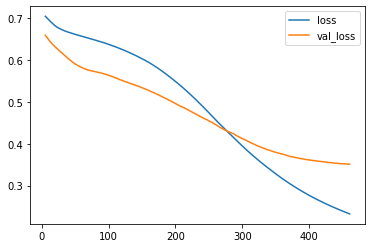

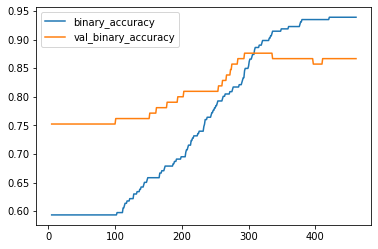

In [94]:
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

In [95]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

Best Validation Loss: 0.3513
Best Validation Accuracy: 0.8762


# Exercise

In this exercise, you'll build a model to predict hotel cancellations with a binary classifier.


In [104]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [105]:
# import data
hotel = pd.read_csv('data/hotel.csv')

In [106]:
# separate the features from target
y = hotel['is_canceled']
X = hotel.drop('is_canceled', axis=1)

In [107]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [108]:
# transform month to number
X['arrival_date_month'] = \
    X['arrival_date_month'].map( { 'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12 } )

In [109]:
# numeric features
features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]


In [110]:
# categorical features
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

In [114]:
transformer_num = make_pipeline(
    SimpleImputer(strategy='constant'), # there are a few missing values
    StandardScaler(),
)

In [115]:
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

In [116]:
preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

In [117]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

In [118]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# 1) Define Model #

The model we'll use this time will have both batch normalization and dropout layers. To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.

Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>


In [120]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# 2) Add Optimizer, Loss, and Metric #

Now compile the model with the Adam optimizer and binary versions of the cross-entropy loss and accuracy metric.

In [122]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

Finally, run this cell to train the model and view the learning curves. It may run for around 60 to 70 epochs, which could take a minute or two.

Epoch 1/200
175/175 [==============================] - 7s 19ms/step - loss: 0.4781 - binary_accuracy: 0.7730 - val_loss: 0.4349 - val_binary_accuracy: 0.8044
Epoch 2/200
175/175 [==============================] - 3s 18ms/step - loss: 0.4230 - binary_accuracy: 0.8017 - val_loss: 0.4044 - val_binary_accuracy: 0.8147
Epoch 3/200
175/175 [==============================] - 3s 18ms/step - loss: 0.4105 - binary_accuracy: 0.8077 - val_loss: 0.3998 - val_binary_accuracy: 0.8165
Epoch 4/200
175/175 [==============================] - 3s 18ms/step - loss: 0.4035 - binary_accuracy: 0.8114 - val_loss: 0.3912 - val_binary_accuracy: 0.8194
Epoch 5/200
175/175 [==============================] - 3s 18ms/step - loss: 0.3979 - binary_accuracy: 0.8147 - val_loss: 0.3892 - val_binary_accuracy: 0.8211
Epoch 6/200
175/175 [==============================] - 4s 20ms/step - loss: 0.3919 - binary_accuracy: 0.8178 - val_loss: 0.3855 - val_binary_accuracy: 0.8233
Epoch 7/200
175/175 [==============================]

<AxesSubplot:title={'center':'Accuracy'}>

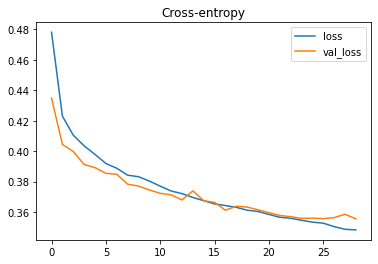

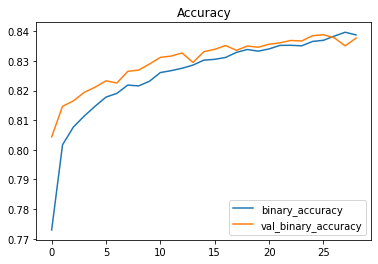

In [124]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# 3) Train and Evaluate #


What do you think about the learning curves? Does it look like the model underfit or overfit? Was the cross-entropy loss a good stand-in for accuracy?

**Though we can see the training loss continuing to fall, the early stopping callback prevented any overfitting. Moreover, the accuracy rose at the same rate as the cross-entropy fell, so it appears that minimizing cross-entropy was a good stand-in. All in all, it looks like this training was a success!**